#Tutorial on CNN
We try to build a DNN that recognize if an image contains a rectangle or a circle, count how many rectangle and circles are there or find where in the image the rectangle/circle is.

## Import useful stuff

In [ ]:
from keras.layers import Input,Conv2D,MaxPooling2D, Flatten, Dense #FILL ME# Which layers will be needed in a CNN ?
from keras.models import Model
import numpy as np
from math import *
from matplotlib import pyplot as plt

## Lets generate some data

We now generate ourself some images with a circle or a rectangle, of random color, in a random position.

Three different modes of generating the images are implemented:

*   A single shape per figure
*   Multiple shapes mixed in each figure
*   A single figure keeping track of the "bounding box"



### Additional Exercise
1. Try adding some random noise in the image background
2. Try adding more classes such e.g. Lines or Ellipses


In [ ]:
import cv2

simple =False #single shape per figure
mixed  =False #multi shapes per figure
withBB =True  #one shape with bounding boxes

def background():
  return np.zeros((64,64,3), np.uint8) #EX# How would you change this to add some background noise?

def randomColor():
  return (int(np.random.rand()*128+128),int(np.random.rand()*128+128),int(np.random.rand()*128+128))

def drawCircle(c,x,y,r):
  img = background()
  cv2.circle(img,(x,y),r,c, -1)
  return img,x-r,y-r,x+r,y+r   #return image and bounding box

def genCircle():
  return drawCircle(randomColor(),int(np.random.rand()*50)+10,int(np.random.rand()*50)+10,
                    int(np.random.rand()*6)+3)

def drawRectangle(c,x,y,w,h):
  img = background()
  cv2.rectangle(img,(x,y),((x+w),(y+h)), c, -1)
  return img,x,y,x+w,y+h #return image and bounding box

def genRectangle():
  return drawRectangle(randomColor(),int(np.random.rand()*40)+10,int(np.random.rand()*40)+10,
                       int(np.random.rand()*12)+5,int(np.random.rand()*12)+5)

def genN(f,i): # generate multiple shapes
  img = np.zeros((64,64,3), np.uint8)
  for x in range(i):
    img+=f()[0] #discard bb info, take only image
  return img

nsamples=10000

#produce figures with either a rectangle or a circle
if simple :
  targets=np.random.rand(nsamples)>0.5
  images=np.array([genCircle()[0] if targets[x] else genRectangle()[0] for x in range(nsamples)])

#produce figure with n rectangles and m circles
if mixed:
  targets=np.array([(int(np.random.rand()*4),int(np.random.rand()*4)) for x in range(nsamples) ])
  images=np.array([genN(genRectangle,targets[x,0])+genN(genCircle,targets[x,1]) for x in range(nsamples)])

if withBB :
#produce figures with either a rectangle or a circle
  targets=np.random.rand(nsamples)>0.5 #np.array([np.random.rand()>0.5 for x in range(nsamples) ])
  imagesWithBB=[genCircle() if targets[x] else genRectangle() for x in range(nsamples)]
  images=np.array([imagesWithBB[x][0] for x in range(nsamples)])
  boundingBoxes=np.array([imagesWithBB[x][1:] for x in range(nsamples)])


Let's show a few of the generated images

(10000, 64, 64, 3)
(10000,)
[False  True  True False False  True]


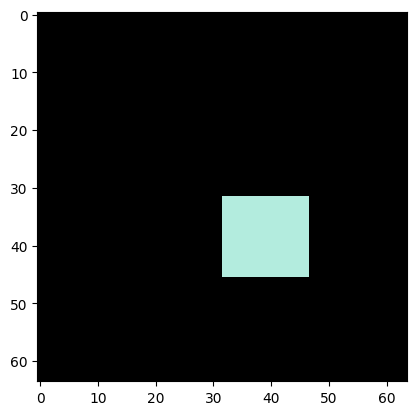

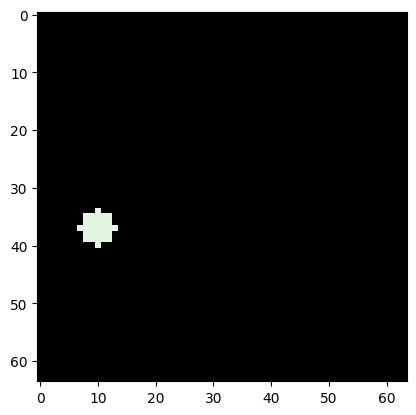

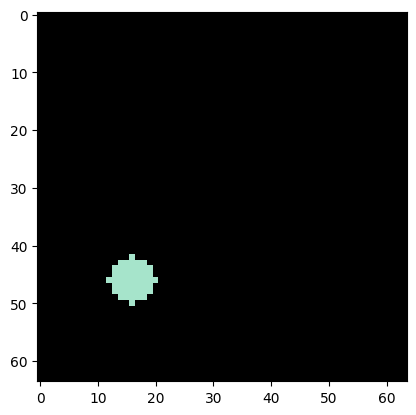

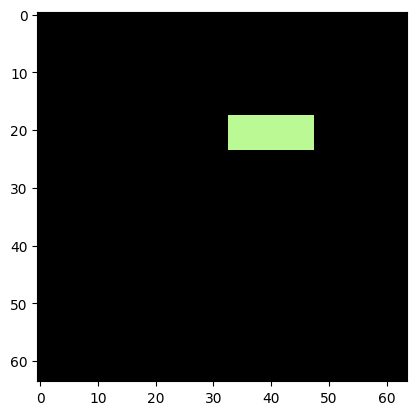

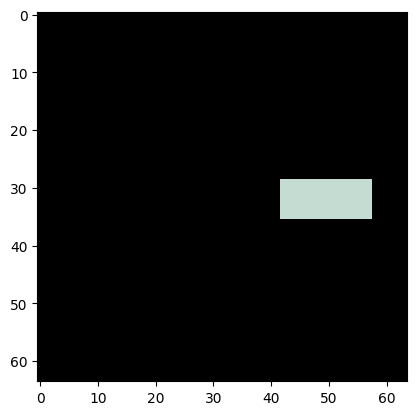

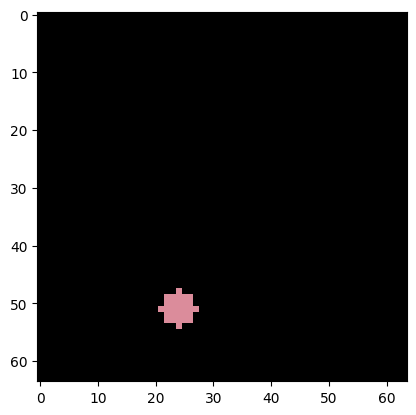

(10000, 4)
[[32 32 46 45]
 [ 7 34 13 40]
 [12 42 20 50]
 [33 18 47 23]]


In [ ]:

print(images.shape)
print(targets.shape)
#FILL ME# print the shape of the images and target data
#FILL ME# print the the first N entries of the target data
print(targets[:6])
#show the first 4 images#
for i in range(6):
  plt.imshow(images[i])
  plt.show()


if withBB:
  print(boundingBoxes.shape)
  print(boundingBoxes[:4])

  #  FILL ME#  print bounding box shapes and first N entries





## Additional Exercise
3. If we have more categories (let say N) we should use a categorical label that is a vector of length N with 1 on the category(/ies) the image belong to and 0 in the others. Try to build a categorical label for two categories

4. Expand the categorical label to  Ellispes or  Lines  and possibly also non exclusive categories such has 2D vs 1D objects

In [ ]:
#QUESTION# What are the tensors now corresponding to "X" and "y" (with previous lecture notation) ?
if withBB :
    labels=[targets,boundingBoxes]
else:
    labels=targets



# Let's build a CNN

Now we build our first CNN. We have some Conv layers interleaved with MaxPooling, and finally we flatten the output of the convolutional stack and appply a Dense FF:
![alt text](https://missinglink.ai/wp-content/uploads/2019/08/LeNet-5-1998.png)


### MaxPooling
![alt text](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)

### Additional Exercise
5. Try adding/removing convolutional layers, change the kernel size, try to add dropout
6. Try changing the model to categorical labels, change loss function from binary_crossentropy to categorical_crossentropy, and use softmax activation instead of sigmoid


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 60, 60, 5)    380         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 20, 20, 5)    0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 18, 18, 5)    230         ['max_pooling2d[0][0]']          
                                                                                              

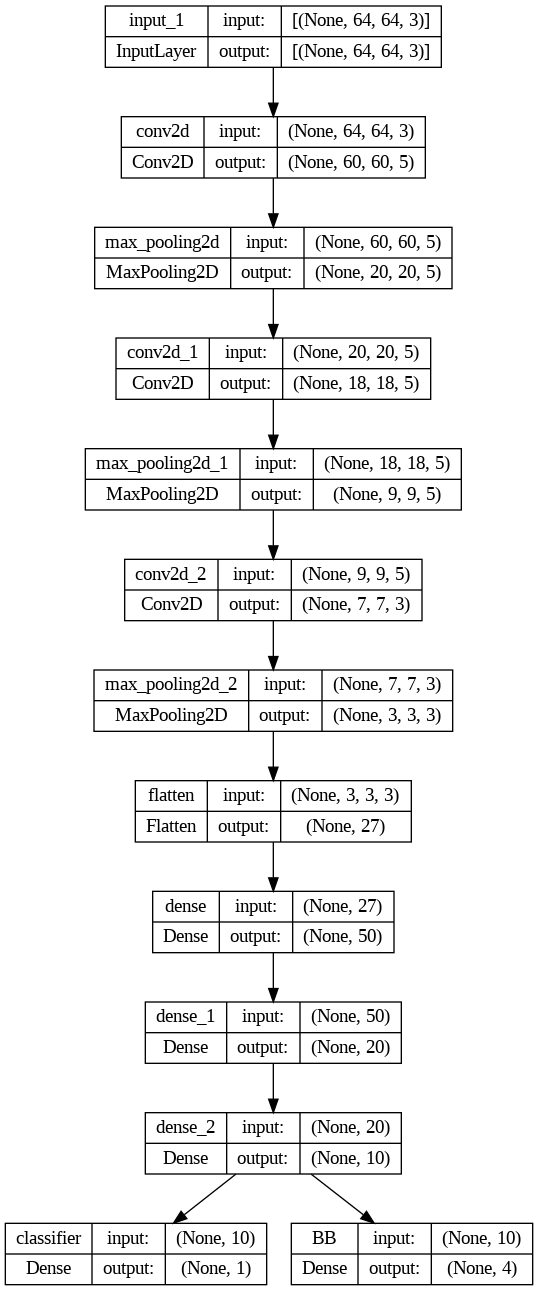

In [ ]:
noConv = False


inputs=Input(shape=(64,64,3 )) #FILL ME# What is the input shape?
if not noConv :
  hidden=Conv2D(5,(5,5),activation="relu")(inputs)
  hidden=MaxPooling2D((3,3))(hidden)
  hidden=Conv2D(5,(3,3),activation="relu")(hidden)
  hidden=MaxPooling2D((2,2))(hidden)
  hidden=Conv2D(3,(3,3),activation="relu")(hidden)
  hidden=MaxPooling2D((2,2))(hidden)
  hidden=Flatten()(hidden)
# try building a CNN with three 2D Conv layers with a number of filters between 3 and 10
# interleave them with with Max  pooling layers
# then use the "Flatten" layer to forget the multidimensional shape
else :
  #if we do not use convolution, we can just flatten the input tensor as first layer
  hidden= Flatten()(inputs)

# after the convolutional part we use standard FeedForward dense layers to further process
hidden=  Dense(50, activation='relu')(hidden)
hidden=  Dense(20, activation='relu')(hidden)
hidden=  Dense(10, activation='relu')(hidden)

#FILL ME# now let's try to decide the output layer, the activation and the loss based on the problem we have
if simple :
  outputs = Dense(1,activation='sigmoid')(hidden)  #FILLME# what is the output shape in this case? which activation?
  loss="binary_crossentropy"  # [0,1] classification hence loss should be => .... ?
if mixed :
  outputs = Dense(2,activation="linear")(hidden) #FILL ME#  Here we want to predict how many rect? and how many Circ?
  loss='MSE' #FILLME#
if withBB : #In this case we have two separate output layers, two target tensors, two losses
  output1 = Dense(1, name="classifier", activation='sigmoid')(hidden) #FILLME# which activation for the circle vs rectangle classification?
  output2 = Dense(4, name="BB",activation='linear')(hidden) #FILLME# which activation to predict the 4 numbers of the bounding box ?
  outputs=[output1,output2]
  loss=["binary_crossentropy","MSE"] #FILL ME # And which loss for each of the two outputs? (the final loss will be the sum unless we give them some additional weights)


model = Model(inputs=inputs, outputs=outputs)
model.compile(loss=loss, optimizer='adam',metrics=['accuracy'])

model.summary()
from tensorflow.keras.utils import plot_model
#if withBB:
#FILL ME#  try to print the graph of the network in this case
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

And now let's fit it to our data.
The sample is automatically split in two so that 50% of it is used for validation and the other half for training


In [ ]:
history=model.fit(images,labels,validation_split=0.5,epochs=500,verbose=1) #FILL ME# Who are "X" and "y" here?

Epoch 1/500
157/157 [==============================] - 19s 13ms/step - loss: 350.5194 - classifier_loss: 8.9801 - BB_loss: 341.5393 - classifier_accuracy: 0.5068 - BB_accuracy: 0.5590 - val_loss: 98.3874 - val_classifier_loss: 6.3078 - val_BB_loss: 92.0796 - val_classifier_accuracy: 0.5098 - val_BB_accuracy: 0.9048
Epoch 2/500
157/157 [==============================] - 2s 10ms/step - loss: 69.7521 - classifier_loss: 3.5056 - BB_loss: 66.2465 - classifier_accuracy: 0.4930 - BB_accuracy: 0.9164 - val_loss: 57.4436 - val_classifier_loss: 2.0468 - val_BB_loss: 55.3967 - val_classifier_accuracy: 0.5082 - val_BB_accuracy: 0.9202
Epoch 3/500
157/157 [==============================] - 2s 11ms/step - loss: 49.1482 - classifier_loss: 1.7604 - BB_loss: 47.3879 - classifier_accuracy: 0.5016 - BB_accuracy: 0.9230 - val_loss: 47.6757 - val_classifier_loss: 1.5457 - val_BB_loss: 46.1300 - val_classifier_accuracy: 0.5164 - val_BB_accuracy: 0.9290
Epoch 4/500
157/157 [==============================] - 

*history* contains information about the training.  We can now now show the loss vs epoch for both validation and training samples.




In [ ]:
print(history.history.keys())
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_classifier_loss"])
plt.plot(history.history["classifier_loss"])
plt.plot(history.history["val_BB_loss"])
plt.plot(history.history["BB_loss"])
plt.yscale('log')
plt.show()
#plt.plot(history.history["val_accuracy"])
#plt.plot(history.history["accuracy"])
#plt.show()


Let's try to create a new image and evaluate it

In [ ]:
#FILL ME# try to generate a new circle and check if the network recognizes it
arect=genCircle()[0]
print(model.predict(arect.reshape(1,64,64,3)))

if mixed :
  im= genCircle()[0]+genRectangle()[0]+genRectangle()[0]
  pred=model.predict(im.reshape(1,64,64,3))
  print(pred.shape)
  print("In this image there are %s rectangle and %s circles"%(pred[0,0],pred[0,1]))
  plt.imshow(im)
  plt.show()

if withBB:
  im,x1,y1,x2,y2= genCircle()
  pre=model.predict(np.expand_dims(im,axis=0) )
  isCircle=pre[0][0]
  x1p=pre[1][0][0]-1.
  y1p=pre[1][0][1]-1.
  x2p=pre[1][0][2]+1.
  y2p=pre[1][0][3]+1.
  print(x1p,y1p,x2p,y2p)
  #print("Looks like a", ("circle" if model.predict(np.expand_dims(im,axis=0) )[0,1] > 0.5 else "rectangle"))
  print("It is a","circle" if isCircle > 0.5 else "rectangle" )
  cv2.rectangle(im,(x1-1,y1-1),(x2+1,y2+1), (255,0,0), 1)
  cv2.rectangle(im,(int(x1p),int(y1p)),(int(x2p),int(y2p)), (255,255,0), 1)
  plt.imshow(im)
  plt.show()
